# Random Forest Classification
## By Giriraj Vaishnav

## 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline

## 2. Reading the csv file

In [2]:
df = pd.read_csv('heart_disease_2.csv')
df.head()

,age,sex,BP,cholestoral,disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


## 3. Divide the data into"Attributes" and "labels"

In [3]:
X = df.drop('disease',axis=1)

y = df['disease']

## 4. Splitting the data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

## 5. Create a Model and Train it

In [5]:
%%time
classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier.fit(X_train, y_train)

Wall time: 481 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

## 6. Visualizing the graph

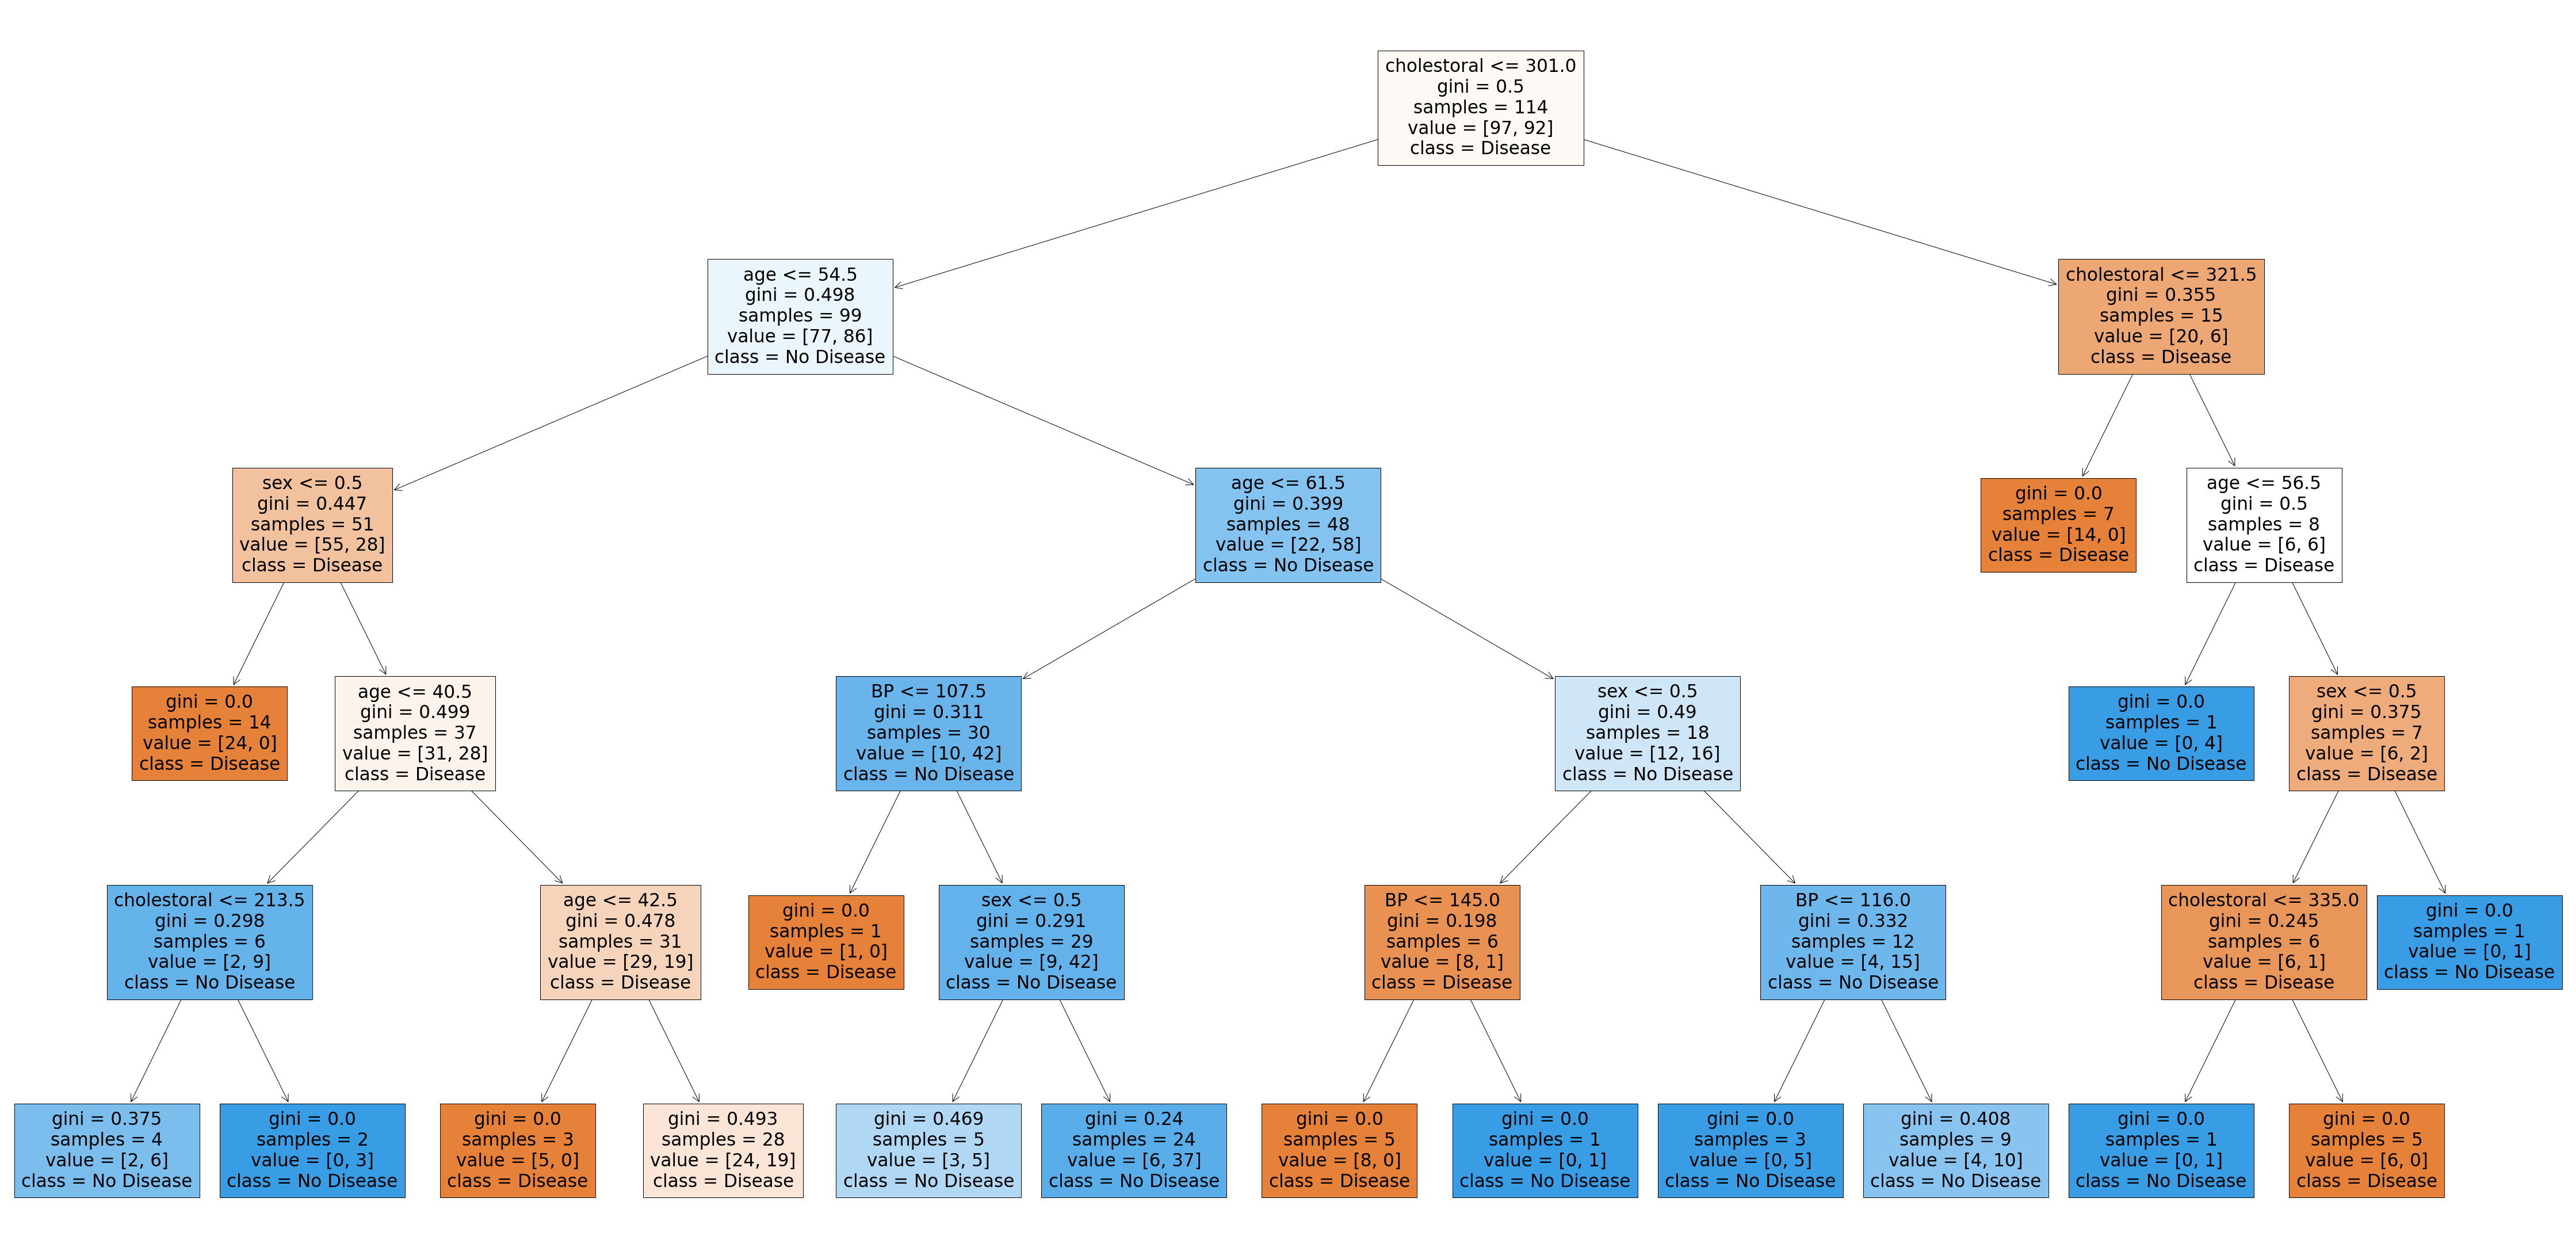

In [8]:
plt.figure(figsize=(80,40))
plot_tree(classifier.estimators_[5], 
          feature_names = X.columns,
          class_names=['Disease', "No Disease"],
          filled=True);

## 7. Evaluate the Model

In [9]:
print("\nPrediction Probability : \n",classifier.predict_proba(X_test))

print("\nPrediction : ",classifier.predict(X_test))

print("\nScore : ",classifier.score(X_test, y_test))


Prediction Probability : 
 [[0.45152562 0.54847438]
 [0.72498766 0.27501234]
 [0.41277067 0.58722933]
 [0.89968062 0.10031938]
 [0.71032473 0.28967527]
 [0.34396643 0.65603357]
 [0.53701058 0.46298942]
 [0.29076378 0.70923622]
 [0.45955298 0.54044702]
 [0.55801855 0.44198145]
 [0.86588704 0.13411296]
 [0.41334552 0.58665448]
 [0.69767705 0.30232295]
 [0.3884709  0.6115291 ]
 [0.38046937 0.61953063]
 [0.60666414 0.39333586]
 [0.47390214 0.52609786]
 [0.69896321 0.30103679]
 [0.2349727  0.7650273 ]
 [0.53632092 0.46367908]
 [0.23476681 0.76523319]
 [0.75536353 0.24463647]
 [0.51956484 0.48043516]
 [0.81968987 0.18031013]
 [0.64658282 0.35341718]
 [0.61133324 0.38866676]
 [0.67796971 0.32203029]
 [0.30700913 0.69299087]
 [0.83000933 0.16999067]
 [0.59326102 0.40673898]
 [0.56572256 0.43427744]
 [0.93669241 0.06330759]
 [0.29675512 0.70324488]
 [0.85613234 0.14386766]
 [0.59150347 0.40849653]
 [0.33630492 0.66369508]
 [0.68998442 0.31001558]
 [0.51247187 0.48752813]
 [0.20535543 0.7946445

## 8. Print Confusion Matrix

In [10]:
print("\nConfusion Matrix : \n",confusion_matrix(y_test, classifier.predict(X_test)))


Confusion Matrix : 
 [[36 13]
 [15 17]]


## 9. Plot Confusion Matrix

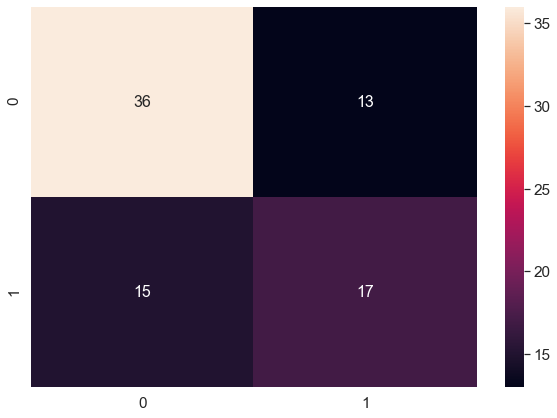

In [11]:
cm = confusion_matrix(y_test, classifier.predict(X_test))

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## 10. Print Classification Report

In [12]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        49
           1       0.57      0.53      0.55        32

    accuracy                           0.65        81
   macro avg       0.64      0.63      0.63        81
weighted avg       0.65      0.65      0.65        81



## 11. Importance of Feature

In [13]:
feature_imp = pd.Series(classifier.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

age            0.375397
cholestoral    0.278449
BP             0.208346
sex            0.137808
dtype: float64

## 12. Plotting feature importance graph

No handles with labels found to put in legend.


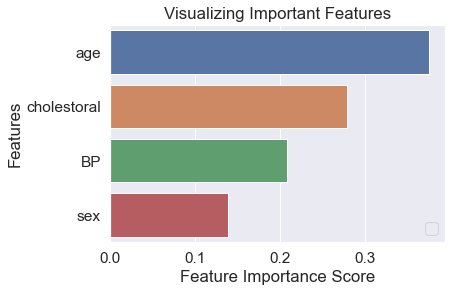

In [14]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()